In [1]:
import sys
sys.path.append('../')
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
import Utils.graphing_helpers
import read_data as rd
import importlib
importlib.reload(Utils.graphing_helpers)
from Utils.graphing_helpers import (plot_vicsek_phase_diagram, plot_dir_cross_vel_phase_diagram,  plot_dir_cross_vel_norm_phase_diagram, 
                                    save_fig_pdf, edges_from_centers_log, edges_from_centers_linear)
from Analysis_Calculations.local_packing_fraction import get_local_packing_fraction

In [2]:
vicsek_values = []
velocity_vicsek_values = []
dir_cross_vel_norm_values = []
packing_std_dev_values = []

phi_values = []
v0_values = []
J_values = []
Dr_values = []

In [3]:
save_dir = "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Saved_Data2"
for phi in [1.0]:
    for v0 in [0.01, 0.03, 0.1]:
        if v0 in [0.01, 0.03]:
            Jv_vals = np.logspace(-3, 0, num=7)
            Dr_vals = np.logspace(-3, 0, num=7)
        else:
            Jv_vals = np.logspace(-3, 0, num=4)
            Dr_vals = np.logspace(-3, 0, num=4)
        for Jv in Jv_vals:
            for Dr in Dr_vals:
                J = Jv/v0
                exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
                run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
                run_dir = os.path.join(save_dir, exp_folder_name, run_folder_name)
                single_stats_filename = os.path.join(run_dir, 'new_single_stats.json')
                with open(single_stats_filename, 'r') as single_stats_file:
                    single_stats = json.loads(single_stats_file.read())
                vicsek_values.append(single_stats['vicsek_param'])
                velocity_vicsek_values.append(single_stats['velocity_vicsek_param'])
                dir_cross_vel_norm_values.append(single_stats['dir_cross_vel_norm'])
                packing_std_dev_values.append(single_stats['packing_std_dev'])
                
                phi_values.append(phi)
                v0_values.append(v0)
                J_values.append(J)
                Dr_values.append(Dr)

In [15]:
save_dir = "/home/ryanlopez/Velocity_Align_Big_Phase_Diagrams"
for phi in [0.6]:
    for v0 in [0.01, 0.03]: #0.1
        if phi == 0.8 and v0 == 0.1:
            continue #didnt have time to simulate
        for Jv in np.logspace(-3, 0, num=13):
            for Dr in np.logspace(-3, 0, num=13):
                J = Jv/v0
                exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
                run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
                run_dir = os.path.join(save_dir, exp_folder_name, run_folder_name)
                single_stats_filename = os.path.join(run_dir, 'new_single_stats.json')
                with open(single_stats_filename, 'r') as single_stats_file:
                    single_stats = json.loads(single_stats_file.read())
                vicsek_values.append(single_stats['vicsek_param'])
                velocity_vicsek_values.append(single_stats['velocity_vicsek_param'])
                dir_cross_vel_norm_values.append(single_stats['dir_cross_vel_norm'])
                packing_std_dev_values.append(single_stats['packing_std_dev'])
                
                phi_values.append(phi)
                v0_values.append(v0)
                J_values.append(J)
                Dr_values.append(Dr)

In [5]:
save_dir = "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Cutoff_Saved_Data3"
for phi in [0.6]:
    for v0 in [0.0026, 0.0120, 0.0600, 0.2500]:
        for Jv in np.logspace(-2, 0, num=7):
            for Dr in np.logspace(-3, -1, num=7):
                J = Jv/v0
                exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
                run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
                run_dir = os.path.join(save_dir, exp_folder_name, run_folder_name)
                single_stats_filename = os.path.join(run_dir, 'new_single_stats.json')
                with open(single_stats_filename, 'r') as single_stats_file:
                    single_stats = json.loads(single_stats_file.read())
                vicsek_values.append(single_stats['vicsek_param'])
                velocity_vicsek_values.append(single_stats['velocity_vicsek_param'])
                dir_cross_vel_norm_values.append(single_stats['dir_cross_vel_norm'])
                packing_std_dev_values.append(single_stats['packing_std_dev'])
                
                phi_values.append(phi)
                v0_values.append(v0)
                J_values.append(J)
                Dr_values.append(Dr)

In [4]:
vicsek_values = np.array(vicsek_values)
velocity_vicsek_values = np.array(velocity_vicsek_values)
dir_cross_vel_norm_values = np.array(dir_cross_vel_norm_values)
packing_std_dev_values = np.array(packing_std_dev_values)

phi_values = np.array(phi_values)
v0_values = np.array(v0_values)
J_values = np.array(J_values)
Dr_values = np.array(Dr_values)

In [5]:
data_points_x = (J_values * v0) / Dr_values
data_points_y = Dr_values / v0_values

In [6]:
len(data_points_y)

114

Text(0.5, 1.0, 'Velocity Alignment - Vicsek Order Parameter - $\\phi=6.00e-01$')

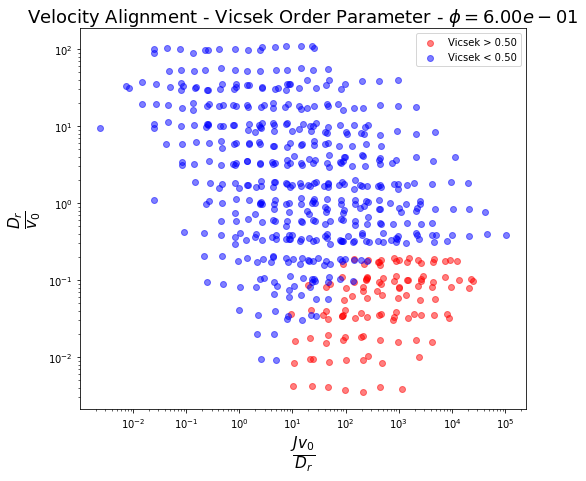

In [11]:
save_dir =  "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Saved_Data2"
fig, axs = plt.subplots(figsize=(8,7))

cutoff = 0.5
yes_x = data_points_x[vicsek_values > cutoff]
yes_y = data_points_y[vicsek_values > cutoff]
no_x = data_points_x[vicsek_values < cutoff]
no_y = data_points_y[vicsek_values < cutoff]
#Add Noise
yes_x = yes_x * np.random.normal(1, 0.05, yes_x.shape)
yes_y = yes_y * np.random.normal(1, 0.05, yes_y.shape)
no_x = no_x * np.random.normal(1, 0.05, no_x.shape)
no_y = no_y * np.random.normal(1, 0.05, no_y.shape)
#Make Plot
plt.scatter(yes_x, yes_y, c='red', label=f'Vicsek > {cutoff:.2f}', alpha=0.5)
plt.scatter(no_x, no_y, c='blue', label=f'Vicsek < {cutoff:.2f}', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel(r'$\frac{Jv_0}{D_r}$', fontsize=22)
plt.ylabel(r'$\frac{D_r}{v_0}$', fontsize=22)
plt.title(rf'Velocity Alignment - Vicsek Order Parameter - $\phi={phi:.2e}$', fontsize=18)
#save_fig_pdf(os.path.join(save_dir, 'dot_diagrams', f'vicsek_dots_diagrams_phi={phi:.4f}.pdf'))

Text(0.5, 1.0, 'Velocity Alignment - Velocity Vicsek Order Parameter - $\\phi=6.00e-01$')

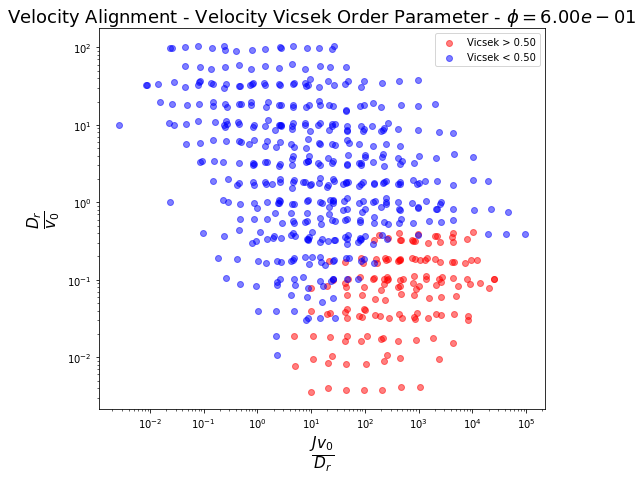

In [12]:
save_dir =  "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Saved_Data2"
fig, axs = plt.subplots(figsize=(8,7))

cutoff = 0.5
yes_x = data_points_x[velocity_vicsek_values > cutoff]
yes_y = data_points_y[velocity_vicsek_values > cutoff]
no_x = data_points_x[velocity_vicsek_values < cutoff]
no_y = data_points_y[velocity_vicsek_values < cutoff]
#Add Noise
yes_x = yes_x * np.random.normal(1, 0.05, yes_x.shape)
yes_y = yes_y * np.random.normal(1, 0.05, yes_y.shape)
no_x = no_x * np.random.normal(1, 0.05, no_x.shape)
no_y = no_y * np.random.normal(1, 0.05, no_y.shape)
#Make Plot
plt.scatter(yes_x, yes_y, c='red', label=f'Vicsek > {cutoff:.2f}', alpha=0.5)
plt.scatter(no_x, no_y, c='blue', label=f'Vicsek < {cutoff:.2f}', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel(r'$\frac{Jv_0}{D_r}$', fontsize=22)
plt.ylabel(r'$\frac{D_r}{v_0}$', fontsize=22)
plt.title(rf'Velocity Alignment - Velocity Vicsek Order Parameter - $\phi={phi:.2e}$', fontsize=18)
#save_fig_pdf(os.path.join(save_dir, 'dot_diagrams', f'velocity_vicsek_dots_diagrams_phi={phi:.4f}.pdf'))

In [ ]:
save_dir =  "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Saved_Data2"
fig, axs = plt.subplots(figsize=(8,7))

cutoff = 0.1
yes_x = data_points_x[dir_cross_vel_norm_values > cutoff]
yes_y = data_points_y[dir_cross_vel_norm_values > cutoff]
no_x = data_points_x[dir_cross_vel_norm_values < cutoff]
no_y = data_points_y[dir_cross_vel_norm_values < cutoff]
#Add Noise
yes_x = yes_x * np.random.normal(1, 0.05, yes_x.shape)
yes_y = yes_y * np.random.normal(1, 0.05, yes_y.shape)
no_x = no_x * np.random.normal(1, 0.05, no_x.shape)
no_y = no_y * np.random.normal(1, 0.05, no_y.shape)
#Make Plot
plt.scatter(yes_x, yes_y, c='green', label=f'Dir Cross Vel > {cutoff:.2f}', alpha=0.5)
plt.scatter(no_x, no_y, c='purple', label=f'Dir Cross Vel < {cutoff:.2f}', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel(r'$\frac{Jv_0}{D_r}$', fontsize=22)
plt.ylabel(r'$\frac{D_r}{v_0}$', fontsize=22)
plt.title(rf'Velocity Alignment - Dir Cross Velocity Norm - $\phi={phi:.2e}$', fontsize=18)
#save_fig_pdf(os.path.join(save_dir, 'dot_diagrams', f'dir_cross_vel_dots_diagrams_phi={phi:.4f}.pdf'))

In [ ]:
save_dir =  "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Saved_Data2"
fig, axs = plt.subplots(figsize=(8,7))

cutoff = 0.1
yes_x = data_points_x[packing_std_dev_values > cutoff]
yes_y = data_points_y[packing_std_dev_values > cutoff]
no_x = data_points_x[packing_std_dev_values < cutoff]
no_y = data_points_y[packing_std_dev_values < cutoff]
#Add Noise
yes_x = yes_x * np.random.normal(1, 0.05, yes_x.shape)
yes_y = yes_y * np.random.normal(1, 0.05, yes_y.shape)
no_x = no_x * np.random.normal(1, 0.05, no_x.shape)
no_y = no_y * np.random.normal(1, 0.05, no_y.shape)
#Make Plot
plt.scatter(yes_x, yes_y, c='orange', label=f'Packing Std Dev > {cutoff:.2f}', alpha=0.5)
plt.scatter(no_x, no_y, c='black', label=f'Packing Std Dev < {cutoff:.2f}', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel(r'$\frac{Jv_0}{D_r}$', fontsize=22)
plt.ylabel(r'$\frac{D_r}{v_0}$', fontsize=22)
plt.title(rf'Velocity Alignment - Packing Fraction Std Dev - $\phi={phi:.2e}$', fontsize=18)
#save_fig_pdf(os.path.join(save_dir, 'dot_diagrams', f'packing_std_dev_dots_diagrams_phi={phi:.4f}.pdf'))

In [8]:
def mscatter(x,y, ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    ax = ax or plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

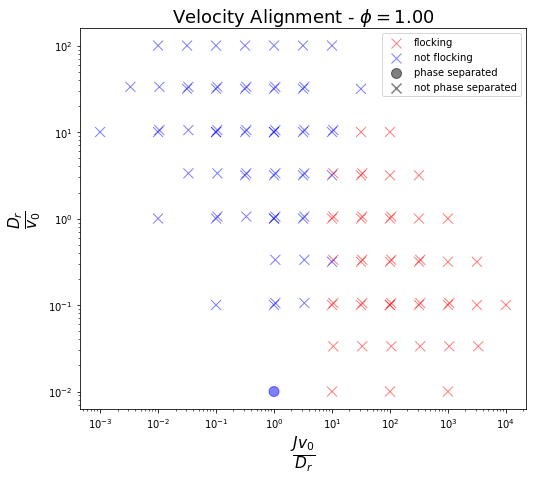

In [10]:
save_dir =  "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Saved_Data2"
fig, axs = plt.subplots(figsize=(8,7))

#Add noise
data_points_x_noise = data_points_x #* np.random.normal(1, 0.05, data_points_x.shape)
data_points_y_noise = data_points_y #* np.random.normal(1, 0.05, data_points_y.shape)

#Determine phase separation
phase_separated_cutoff = 0.1
markers = np.where(packing_std_dev_values >= phase_separated_cutoff, 'o', 'x')

#Determine dir cross vel norm vortices
dir_cross_vel_cutoff = 0.1
vortex_condition = dir_cross_vel_norm_values >= dir_cross_vel_cutoff
vortex_x = data_points_x_noise[vortex_condition]
vortex_y = data_points_y_noise[vortex_condition]
vortex_markers = list(markers[vortex_condition])

#Determine flocking
vicsek_cutoff = 0.5
flocking_condition = np.logical_and(velocity_vicsek_values >= vicsek_cutoff, dir_cross_vel_norm_values < dir_cross_vel_cutoff)
flock_x = data_points_x_noise[flocking_condition]
flock_y = data_points_y_noise[flocking_condition]
flock_markers = list(markers[flocking_condition])

#Determine not flocking
not_flocking_condition = np.logical_and(velocity_vicsek_values < vicsek_cutoff, dir_cross_vel_norm_values < dir_cross_vel_cutoff)
not_flock_x = data_points_x_noise[not_flocking_condition]
not_flock_y = data_points_y_noise[not_flocking_condition]
not_flock_markers = list(markers[not_flocking_condition])

#Make Plot
#mscatter(vortex_x, vortex_y, c='green', label='vortex', alpha=0.5, m=vortex_markers, s=100)
mscatter(flock_x, flock_y, c='red', label='flocking', alpha=0.5, m=flock_markers, s=100)
mscatter(not_flock_x, not_flock_y, c='blue', label='not flocking', alpha=0.5, m=not_flock_markers, s=100)

#Make empty plots for legend
plt.scatter([], [], c='black', marker='o', alpha=0.5, s=100, label='phase separated')
plt.scatter([], [], c='black', marker='x', alpha=0.5, s=100, label='not phase separated')

#Add stars for simulation movies
#plt.scatter(data_points_x[96, None], data_points_y[96, None], c='black', marker='*', alpha=0.5, s=100)
#plt.scatter(data_points_x[242, None], data_points_y[242, None], c='black', marker='*', alpha=0.5, s=100)
#plt.scatter(data_points_x[212, None], data_points_y[212, None], c='black', marker='*', alpha=0.5, s=100)
#plt.scatter(data_points_x[263, None], data_points_y[263, None], c='black', marker='*', alpha=0.5, s=100)

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel(r'$\frac{Jv_0}{D_r}$', fontsize=22)
plt.ylabel(r'$\frac{D_r}{v_0}$', fontsize=22)
plt.title(rf'Velocity Alignment - $\phi={phi:.2f}$', fontsize=18)
save_fig_pdf(os.path.join(save_dir, 'dot_diagrams', f'combined_dots_diagrams_phi={phi:.4f}.pdf'))